## Unit 7 | Assignment - Distinguishing Sentiments

## Background

**Twitter** has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose **one** of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.

In [1]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_terms = ("@BBCWorld","@CBSNews","@CNN","@FoxNews","@nytimes")

data = pd.DataFrame()

In [3]:
#* Pull into a DataFrame the tweet's source acount, its text, its date, 
#and its compound, positive, neutral, and negative sentiment scores.

for target in target_terms:
    
    public_tweets = api.user_timeline(target,count=100)
    
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        temp_df = pd.DataFrame(results, index=[0])
        temp_df['Target'] = target
        temp_df['Text'] = tweet["text"]
        temp_df['Date'] = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
        
        data = data.append(temp_df)                              

In [ ]:
tweet

In [4]:
data.reset_index(drop=True)

,compound,neg,neu,pos,Target,Text,Date
0,-0.2263,0.137,0.863,0.000,@BBCWorld,Jordan's King Abdullah calls for tax review af...,2018-06-05 18:32:39+00:00
1,0.2263,0.234,0.419,0.347,@BBCWorld,Ethiopia 'accepts peace deal' to end Eritrea b...,2018-06-05 18:32:37+00:00
2,0.0000,0.000,1.000,0.000,@BBCWorld,Parkland teenager David Hogg 'swatted' in pran...,2018-06-05 18:30:19+00:00
3,-0.6486,0.223,0.777,0.000,@BBCWorld,Tributes paid as fashion designer Kate Spade i...,2018-06-05 17:52:40+00:00
4,-0.6908,0.190,0.810,0.000,@BBCWorld,RT @bbcworldservice: Do asylum seekers from th...,2018-06-05 16:52:45+00:00
5,-0.6486,0.417,0.583,0.000,@BBCWorld,Fashion designer Kate Spade found dead https:/...,2018-06-05 16:20:35+00:00
6,0.7430,0.000,0.442,0.558,@BBCWorld,'Beauty iceberg' thrills Newfoundland and Labr...,2018-06-05 16:05:15+00:00
7,0.0000,0.000,1.000,0.000,@BBCWorld,RT @BBCAfrica: An earthquake is coming. #BBCAf...,2018-06-05 15:01:51+00:00
8,-0.6597,0.386,0.614,0.000,@BBCWorld,Guatemala's Fuego volcano: How the tragedy unf...,2018-06-05 14:44:17+00:00
9,-0.5423,0.226,0.774,0.000,@BBCWorld,Crocodile kills pastor conducting baptism cere...,2018-06-05 14:43:49+00:00


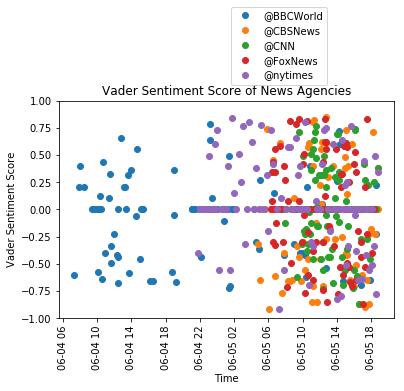

In [5]:
for target in target_terms:
    plt.plot_date(data[data['Target'] == target]['Date'], 
                  data[data['Target'] == target]['compound'],
                  label = target)


plt.ylim(-1,1)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.05))
plt.xlabel('Time')
plt.ylabel('Vader Sentiment Score')
plt.title('Vader Sentiment Score of News Agencies')
plt.xticks(rotation=90);

In [6]:
data = data.set_index(keys='Target')
data.to_csv('tweets_analysis.csv')

In [7]:
data.groupby('Target').mean()

,compound,neg,neu,pos
Target,,,,
@BBCWorld,-0.078728,0.11146,0.80771,0.08083
@CBSNews,-0.076623,0.10142,0.83656,0.06201
@CNN,-0.008537,0.06570,0.87071,0.06361
@FoxNews,0.005365,0.08723,0.83661,0.07617
@nytimes,0.061547,0.05099,0.86840,0.08061


1) BBC tweets a lot less than the other news sites resulting in the graph skewed to the left as grabbing 100 of their latests tweets shows tweets from a lot older day than the other news sources
2) There are many neutral tweets shown by a line along y=0
3) There is no trend of a certain news source using more positive/negative words in their tweets, all seem to have their tweets' VADER scores seem to be pretty random